In [25]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [26]:
train = torchvision.datasets.MNIST(
  root='.',
  train=True,
  transform=transforms.ToTensor(),
  download=True
)

In [27]:
train.data.shape

torch.Size([60000, 28, 28])

In [28]:
train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [29]:
test = torchvision.datasets.MNIST(
  root= '.',
  train=False,
  transform=transforms.ToTensor(),
  download=True
)
test.data.shape

torch.Size([10000, 28, 28])

In [30]:
# build the model
# 3 layers ANN

model = nn.Sequential(
  nn.Linear(784,450),
  nn.ReLU(),
  nn.Linear(450,128),
  nn.ReLU(),
  nn.Linear(128,10)
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=450, bias=True)
  (1): ReLU()
  (2): Linear(in_features=450, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [32]:
#Data Loader, generating batches with pytorch api

batch_size = 300

train_loader = torch.utils.data.DataLoader(dataset=train,batch_size=batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [33]:
#train the model

n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    #move data to gpu if needed
    inputs,targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1,784)
    optimizer.zero_grad()

    #forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  #Getting train loss and test loss
  train_loss = np.mean(train_loss)
  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)
  train_losses[it] = train_loss
  test_losses[it] = test_loss
  print(f'Epoch {it+1}/{n_epochs}, Train Losses: {train_loss:.4f}, Test Losses: {test_loss:.4f}')


Epoch 1/10, Train Losses: 0.4266, Test Losses: 0.1916
Epoch 2/10, Train Losses: 0.1545, Test Losses: 0.1249
Epoch 3/10, Train Losses: 0.1027, Test Losses: 0.1049
Epoch 4/10, Train Losses: 0.0748, Test Losses: 0.0845
Epoch 5/10, Train Losses: 0.0571, Test Losses: 0.0729
Epoch 6/10, Train Losses: 0.0448, Test Losses: 0.0742
Epoch 7/10, Train Losses: 0.0345, Test Losses: 0.0711
Epoch 8/10, Train Losses: 0.0266, Test Losses: 0.0760
Epoch 9/10, Train Losses: 0.0229, Test Losses: 0.0652
Epoch 10/10, Train Losses: 0.0171, Test Losses: 0.0744


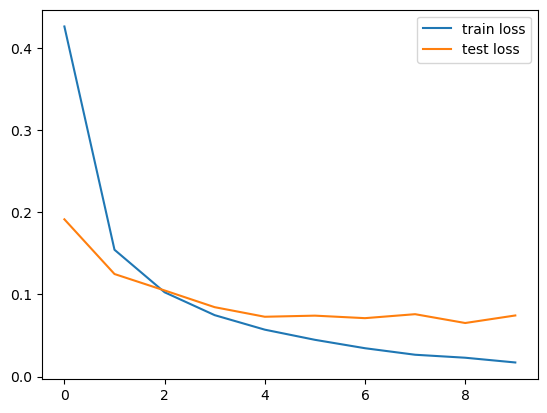

In [34]:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [39]:
#Accuracy 

n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1,784)
  outputs = model(inputs)

  _, predictions = torch.max(outputs,1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct/n_total


n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1,784)
  outputs = model(inputs)

  _, predictions = torch.max(outputs,1)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct/n_total

print(f"Train acc: {train_acc: .4f}, Test acc: {test_acc: .4f}")

Train acc:  0.9963, Test acc:  0.9782


In [40]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') /cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
    horizontalalignment='center',
    color='white' if cm[i, j] >thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 970    1    1    1    1    2    1    1    1    1]
 [   0 1124    3    1    0    1    2    0    4    0]
 [   6    0 1002    2    3    0    3    7    8    1]
 [   0    0    2  997    0    2    0    3    3    3]
 [   1    0    0    1  966    0    3    3    1    7]
 [   2    0    0   17    1  864    2    1    4    1]
 [   6    2    1    1   11    8  924    0    5    0]
 [   1    2    4    2    2    1    0 1007    2    7]
 [   6    0    2    5    3    3    0    3  946    6]
 [   2    2    0    6   10    3    0    2    2  982]]


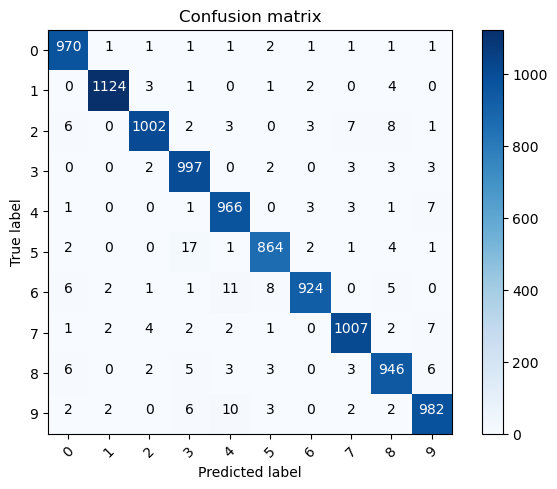

In [41]:
x_test = test.data.detach().numpy()
y_test = test.targets.detach().numpy()
p_test = np.array([])

for inputs, targets in test_loader:
  inputs = inputs.to(device)
  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs,1)
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted: 7')

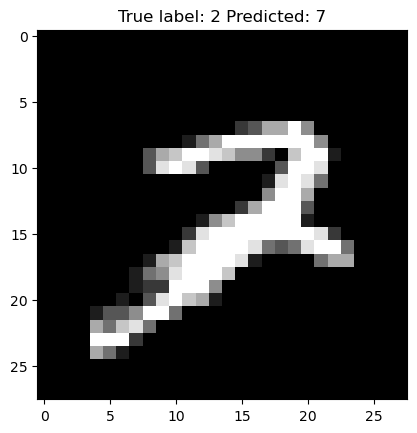

In [42]:
#show some misclassified examples
  
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], int(p_test[i])))